# Liquid fraction & Bubble radius
In this tutorial you will learn to measure liquid fraction and individual bubble radius from respectively phase-segmented (cleaned) and bubble segmented (no-edge) images.
    
The tutorial is divided in the following sections:
- Import libraries
- Quantification folders
- Get familiar with the input data
- Liquid fraction
- Get familiar with the input data
- Individual bubble properties
- Remove bubbles at the edges
- Equivalent radius distribution

## A) Import libraries

In [1]:
from FoamQuant import *
import numpy as np
import os
import matplotlib.pyplot as plt; plt.rc('font', size=20) 
from tifffile import imread
import pickle as pkl
import pandas as pd

## B) Quantification folders

In [2]:
# Processing folders names
Quant_Folder = ['Q1_LiqFrac_Glob','Q2_LiqFrac_Cartesian','Q3_Bubble_Prop']

# Create the quantification folders (where we are going to save our results)
for Pi in Quant_Folder:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        print('Created folder:',Pi)
        os.mkdir(Pi)

path already exist: Q1_LiqFrac_Glob
path already exist: Q2_LiqFrac_Cartesian
path already exist: Q3_Bubble_Prop


## C) Get familiar with the input data

In [3]:
# Name and directory of the speckle-cleaned images
dircleaned = 'P3_Cleaned/'
namecleaned = 'Cleaned_'

# Read the first image of the series
str_index = strindex(1, n0=3)
print('The string index suffix: ', str_index)
fullname = dircleaned+namecleaned+str_index+'.tiff'
print('The full directory+name: ', fullname)

FirstCleanIm = imread(fullname)

The string index suffix:  001
The full directory+name:  P3_Cleaned/Cleaned_001.tiff


/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/Jupy_FoamQuant/FoamQuant/Figure.py:90: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


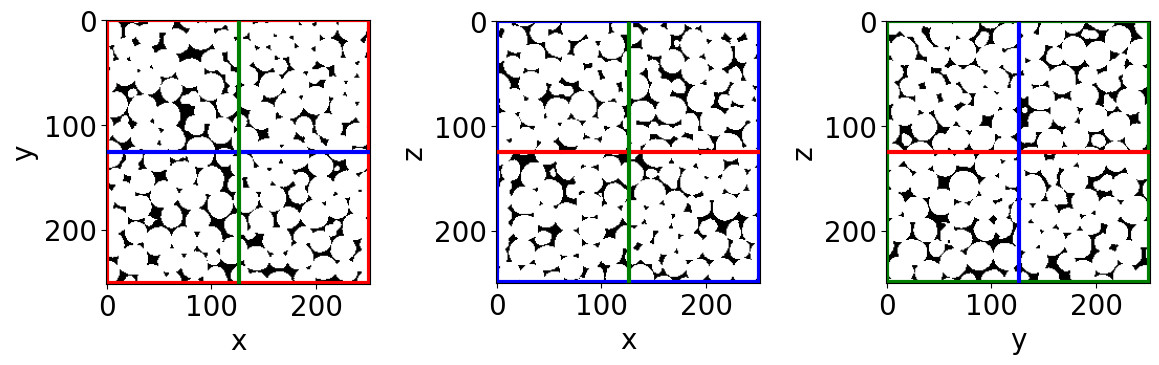

In [4]:
# Show a 3D-cut view of the volume
Cut3D(FirstCleanIm, 
      showcuts=True, # Shows the red, blue and green cuts.
      nameaxes=['z','y','x'], # Shows the name of the axes, here z,y,x.
      figblocksize=4,# This parrameter gives the size of the produced figure (here 4*3 along the horizontal,  along the vertical).
      cmap='gray')   # The default colormap used by this function is 'gray' but can be modified here.

## D) Liquid fraction

The liquid fraction is an essential parrameter when studying liquid foam. It is quantified from the phase-segmented images, as the number of liquid phase voxels divided by the total number of voxels inside a given volume:

$\phi_\ell = \frac{N_l}{N_l+N_g}$

where $N_l$ and $N_g$ are the liquid and gas volumes respectively in number of voxels. 

**Full-image liquid fraction**

Here we want to know how the full image liquid fraction evolves with time.

In [5]:
# Name and directory where we are going to save the global liquid fractions
dir_lf_glob = 'Q1_LiqFrac_Glob/'
name_lf_glob = 'LiqFrac_Glob_'

# Indexes of the images of our time-series (we are working here with 10 subsequent images of the same foam sample, evolving over time).
imrange = [1,2,3,4,5,6,7,8,9,10]

# Liquid fraction function
LiqFrac_Batch(namecleaned, 
              name_lf_glob, 
              dircleaned, 
              dir_lf_glob, 
              imrange, 
              TypeGrid='Global', # <- a single value per image
              verbose=True, 
              Masktype = [False, False])

Path exist: True
LiqFrac_Glob_001: done
LiqFrac_Glob_002: done
LiqFrac_Glob_003: done
LiqFrac_Glob_004: done
LiqFrac_Glob_005: done
LiqFrac_Glob_006: done
LiqFrac_Glob_007: done
LiqFrac_Glob_008: done
LiqFrac_Glob_009: done
LiqFrac_Glob_010: done


In [6]:
# Read the global liquid fractions
List_lf_Global = []
for timei in imrange:
    with open(dir_lf_glob + name_lf_glob + strindex(timei, n0=3) + '.pkl','rb') as file:
        lf_Global = pkl.load(file)['lf']
        List_lf_Global.append(lf_Global)

print('Global liquid fraction as a function of time:\n', np.asarray(List_lf_Global))

Global liquid fraction as a function of time:
 [0.14812106 0.14536508 0.14993783 0.14911722 0.14338045 0.14822921
 0.14275831 0.14482527 0.14253219 0.14275472]


**Liquid fraction along a cartesian grid**

Now we want to know how the liquid fraction is distributed in space. We are going to use the same function but indicate that we want a cartesian mesh output **TypeGrid='CartesMesh'**.

In [7]:
# Name and directory where we are going to save the cartesian-grid liquid fractions
dir_lf_car = 'Q2_LiqFrac_Cartesian/'
name_lf_car = 'LiqFrac_Cartesian_'

# Get liquid fraction in cartesian subvolumes
# (volume percentage of liquid in each subvolumes)
LiqFrac_Batch(namecleaned, 
              name_lf_car, 
              dircleaned, 
              dir_lf_car, 
              imrange, 
              TypeGrid='CartesMesh', # <- a cartesian grid of liquid fractions
              Nz=5,                  # Indicates the number of boxes along z
              Ny=12,                 # ...along y
              Nx=8,                  # ...along x
              verbose=1,
              structured=True,
              Masktype = [False, False]) # <- can be turned on for cylindrical masking around the axis of rotation and in the perriphery

Path exist: True
LiqFrac_Cartesian_001: done
LiqFrac_Cartesian_002: done
LiqFrac_Cartesian_003: done
LiqFrac_Cartesian_004: done
LiqFrac_Cartesian_005: done
LiqFrac_Cartesian_006: done
LiqFrac_Cartesian_007: done
LiqFrac_Cartesian_008: done
LiqFrac_Cartesian_009: done
LiqFrac_Cartesian_010: done


In [8]:
# Read all the Cartesian mesh liquid fractions
List_lf_Car = []
for timei in imrange:
    with open(dir_lf_car + name_lf_car + strindex(timei, n0=3) + '.pkl','rb') as file:
        lf_Car = pkl.load(file)['lf']
        List_lf_Car.append(lf_Car)

In [9]:
# Result shape: Number of images / Nz / Ny / Nx
np.shape(List_lf_Car)

(10, 5, 12, 8)

We now gonna represent the liquid fraction field with the same figure tool that we used for observing our images: **Cut3D**.

vmin = 0.1 vmax = 0.2


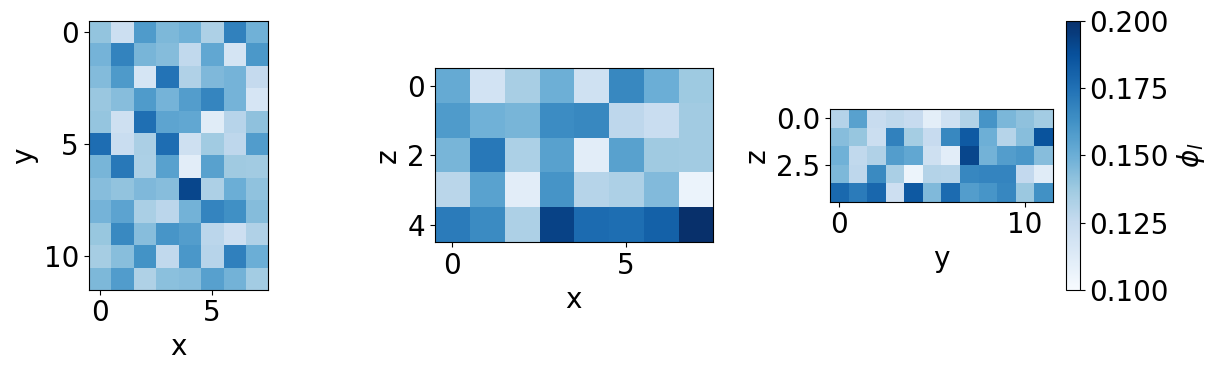

In [10]:
# Orthogonal cut view of the liquid fraction field obtained from the first image of the series 
fig,ax,neg = Cut3D(List_lf_Car[0],
                   nameaxes=['z','y','x'],
                   cmap='Blues',
                   vmin=0.10,
                   vmax=0.20,
                   returnfig=True,
                   figblocksize=4)
fig.colorbar(neg[2], label=r'$\phi_l$')

The orthogonal cuts can be seen with **Cut3D**. The orthogonal projection view can be seen with **Proj3D**. The projections are averages.

vmin = 0.1 vmax = 0.2


/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/Jupy_FoamQuant/FoamQuant/Figure.py:160: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


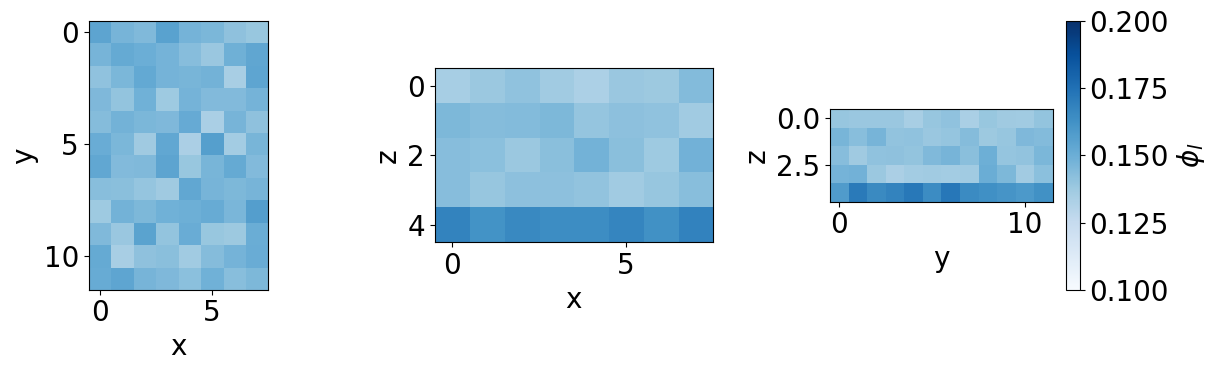

In [11]:
# Orthogonal projection view of the time-averaged liquid fraction field
lf_time_average = np.mean(List_lf_Car,0)
fig,ax,neg = Proj3D(lf_time_average,
                    nameaxes=['z','y','x'],
                    cmap='Blues',
                    vmin=0.10,
                    vmax=0.20,
                    returnfig=True,
                    figblocksize=4)
fig.colorbar(neg[2], label=r'$\phi_l$')

## E) Get familiar with the input data

Let's read the first bubble-segmented image of the series (with no bubble on the edges). 

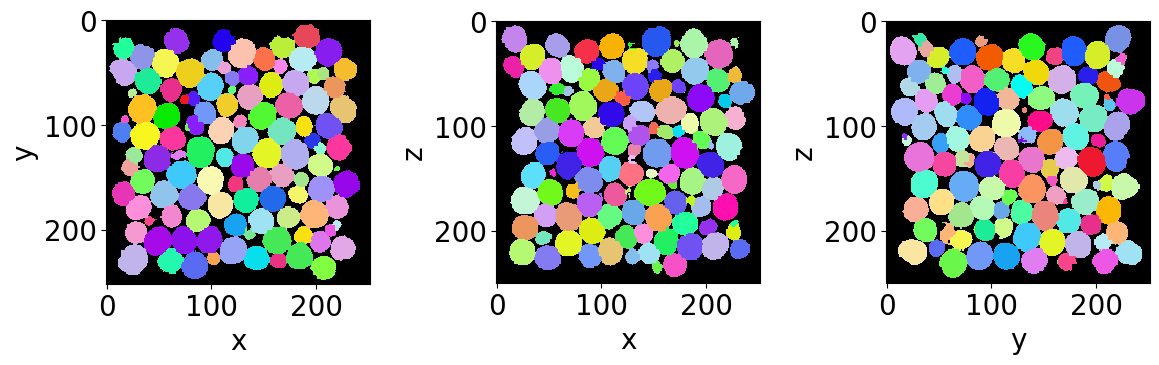

In [12]:
# Name and directory where the bubble segmented images are saved
dirnoedge = 'P5_BubbleNoEdge/'
namenoedge = 'BubbleNoEdge_'

# Read the first image of the series
Lab = imread(dirnoedge+namenoedge+strindex(1, 3)+'.tiff')

# Since we are now looking at more bubbles let's create a "larger" random colormap: here 500 random colors
rcmap = RandomCmap(500, verbose=False)

# Show a 3D-cut view of the volume
Cut3D(Lab,  
      nameaxes=['z','y','x'],
      cmap=rcmap, 
      interpolation='nearest', 
      figblocksize=4)

## F) Individual bubble properties (RegProps)
We want here to extract from each bubble region, its equivalent radius. To do so we are going to use the **RegionProp_Batch** function. It is essentially a wrapped of **regionprops** from scikit-image.

In [13]:
# Name and directory where we are going to save the bubble region properties
dir_Bubble_prop = 'Q3_Bubble_Prop/'
name_Bubble_prop = 'Bubble_Prop_'

RegionProp_Batch(namenoedge,
                 name_Bubble_prop,
                 dirnoedge,
                 dir_Bubble_prop,
                 imrange,
                 verbose=True,
                 endread='.tiff', 
                 endsave='.tsv')

Path exist: True
Bubble_Prop_001: done
Bubble_Prop_002: done
Bubble_Prop_003: done
Bubble_Prop_004: done
Bubble_Prop_005: done
Bubble_Prop_006: done
Bubble_Prop_007: done
Bubble_Prop_008: done
Bubble_Prop_009: done
Bubble_Prop_010: done


## G) Equivalent radius
Let's open the first saved bubble-properties table with **pandas**.

In [14]:
df = pd.read_csv(dir_Bubble_prop+name_Bubble_prop+strindex(1,n0=3)+'.tsv',sep = '\t')
display(df)

,lab,z,y,x,vol,rad,area,sph,volfit,S1,...,e2y,e2x,e3z,e3y,e3x,U1,U2,U3,U,type
0,1,15.286670,79.575571,183.687352,7622.0,12.208438,1889.990904,0.997457,7696.702997,11.356878,...,12.123131,0.558382,-0.565461,0.558382,12.288122,-0.075555,0.016856,0.058699,0.118985,1
1,2,16.593385,130.636373,17.162980,9584.0,13.177087,2204.247246,0.996115,9674.503042,12.035502,...,12.727413,-0.753596,-0.022763,-0.753596,12.968875,-0.093752,0.022430,0.071322,0.146864,1
2,3,15.635897,172.321484,101.120593,10324.0,13.507857,2309.744140,0.997574,10400.092065,12.805426,...,13.886619,-0.036291,-0.224959,-0.036291,13.241960,-0.055850,-0.019896,0.075747,0.117809,-1
3,4,15.538057,175.370390,217.745069,9328.0,13.058701,2154.914928,0.997516,9371.282698,12.381921,...,12.635434,-0.351062,0.549606,-0.351062,12.901907,-0.054760,-0.022566,0.077326,0.119294,-1
4,5,15.121800,200.194312,163.705468,10936.0,13.769663,2403.553261,0.997433,11037.743266,13.050254,...,14.409886,0.621144,-0.254747,0.621144,13.336950,-0.056747,-0.021472,0.078219,0.121240,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,937,232.931714,209.884521,86.382444,9387.0,13.086175,2168.907873,0.998400,9475.291923,12.489027,...,13.894511,-0.170001,-0.174207,-0.170001,12.962521,-0.049827,-0.009192,0.059018,0.095265,-1
937,938,234.656031,34.253836,50.915761,9841.0,13.293833,2235.291662,0.997166,9895.232739,12.680207,...,12.997291,-0.130880,-0.529484,-0.130880,12.878073,-0.049090,-0.035787,0.084877,0.127836,-1
938,939,234.123875,156.617150,218.298716,9889.0,13.315411,2238.448309,0.998684,9938.866176,12.619337,...,13.528568,-0.152264,0.059711,-0.152264,13.724473,-0.055368,0.015737,0.039632,0.085592,1
939,940,234.464956,224.364352,219.393250,9274.0,13.033453,2143.488520,0.998308,9307.919924,12.256650,...,12.866831,-0.005062,0.036705,-0.005062,13.650618,-0.062668,0.017493,0.045175,0.097010,1


Now we can plot, for example, the bubble equivalent radius distribution, the mean radius and Sauter radius.

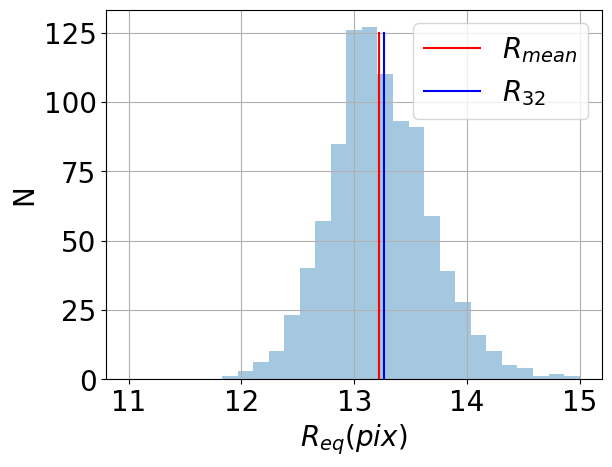

In [33]:
# Equivalent radius distribution
df['rad'].hist(bins=np.linspace(11,15,30), alpha=0.4)

#Mean radius
Rmean = np.mean(df['rad'])
plt.plot([Rmean,Rmean],[0,125],'r-', label=r'$R_{mean}$')
#Mean Sauter radius
R32 = np.sum(np.power(df['rad'],3))/np.sum(np.power(df['rad'],2))
plt.plot([R32,R32],[0,125],'b-', label=r'$R_{32}$')

plt.xlabel(r'$R_{eq} (pix)$')
plt.ylabel('N')
plt.legend()

You have now completed this tutorial. I hope it has been helpfull to you. Go back to [FoamQuant - Examples](https://foamquant.readthedocs.io/en/latest/examples.html) for more examples and tutorials.